In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [47]:
df = pd.read_csv('data.csv')
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)
df.diagnosis = [1 if i=="M" else 0 for i in df.diagnosis]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [49]:
y = df.diagnosis.values
x_data = df.drop(["diagnosis"],axis=1)

In [50]:
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [53]:
# parameter initialize and sigmoid function
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

In [54]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [55]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = y_train*np.log(y_head) - (1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]

    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {'derivative_weight':derivative_weight,'derivative_bias':derivative_bias}

    return cost,gradients

In [59]:
# updating parameters
def update(w,b,x_train,y_train,learning_rate,number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []

    # updating(learning) parameters for num_of_iter times

    for i in range(number_of_iteration):
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        #lets update
        w = w-learning_rate * gradients['derivative_weight']
        b = b-learning_rate*gradients['derivative_bias']
        if i % 10 == 0:
           cost_list2.append(cost)
           index.append(i)
           print("Cost after iteraion {}: {}".format(index,cost))
    # we update(learn) parameters weights and bias
    parameters = {'weight':w,'bias':b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel('Number of Iteration')
    plt.ylabel('Cost')
    plt.show()
    return parameters,gradients,cost_list

In [60]:
# prediction
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteraion [0]: 0.21370877978722774
Cost after iteraion [0, 10]: 0.07077904085139379
Cost after iteraion [0, 10, 20]: 0.047852636725581904
Cost after iteraion [0, 10, 20, 30]: 0.034938638743841975
Cost after iteraion [0, 10, 20, 30, 40]: 0.026713979700046773
Cost after iteraion [0, 10, 20, 30, 40, 50]: 0.021006544535457885
Cost after iteraion [0, 10, 20, 30, 40, 50, 60]: 0.01680490016561766
Cost after iteraion [0, 10, 20, 30, 40, 50, 60, 70]: 0.013577599498824562
Cost after iteraion [0, 10, 20, 30, 40, 50, 60, 70, 80]: 0.011018485445339397
Cost after iteraion [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]: 0.00893836576720431
Cost after iteraion [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]: 0.007213755795437674
Cost after iteraion [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]: 0.005760468440382281
Cost after iteraion [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]: 0.004519040463872448
Cost after iteraion [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]: 0.00344

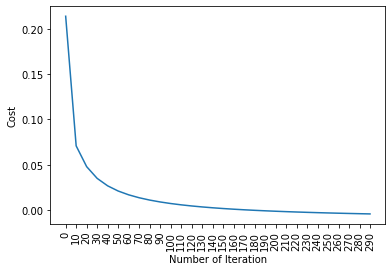

test accuracy : 96.49122807017544 %


In [61]:
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,num_iterations):
    dimension = x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    parameters,gradients,cost_list = update(w,b,x_train,y_train,learning_rate,num_iterations)
    y_prediction_test = predict(parameters['weight'],parameters['bias'],x_test)
    print('test accuracy : {} %'.format(100-np.mean(np.abs(y_prediction_test - y_test))*100))
logistic_regression(x_train,y_train,x_test,y_test,learning_rate=1,num_iterations=300)

In [77]:
# with sklearn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
lr.fit(x_train,y_train)
lr.score(x_test,y_test)
lr.predict(x_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [78]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])